Examen Informatique(Python) S1 2021/2022

TATA ILES____Groupe:01_____Section:01

In [1]:
import numpy as np 
import pandas as pd 

Importer la bsae de donneé

In [82]:
data=pd.read_csv("Downloads/flights_1.csv")
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,5,30,6,UA,814,N448UA,LAX,LAS,1305,...,1412.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,6,19,5,B6,202,N663JB,FLL,JFK,1126,...,1408.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,1,4,DL,2335,N989DL,10397,13303,1909,...,2100.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,26,1,UA,1448,N69826,MSY,IAH,755,...,914.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,7,5,7,UA,1671,N36476,SFO,SAN,600,...,719.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5819 non-null   int64  
 1   MONTH                5819 non-null   int64  
 2   DAY                  5819 non-null   int64  
 3   DAY_OF_WEEK          5819 non-null   int64  
 4   AIRLINE              5819 non-null   object 
 5   FLIGHT_NUMBER        5819 non-null   int64  
 6   TAIL_NUMBER          5804 non-null   object 
 7   ORIGIN_AIRPORT       5819 non-null   object 
 8   DESTINATION_AIRPORT  5819 non-null   object 
 9   SCHEDULED_DEPARTURE  5819 non-null   int64  
 10  DEPARTURE_TIME       5724 non-null   float64
 11  DEPARTURE_DELAY      5724 non-null   float64
 12  TAXI_OUT             5723 non-null   float64
 13  WHEELS_OFF           5723 non-null   float64
 14  SCHEDULED_TIME       5819 non-null   float64
 15  ELAPSED_TIME         5711 non-null   f

Question 1 : Connaitre la base de donneé

In [4]:
#1
print(f"Le nombre de vols dans cette base de donnée est : {data.shape[0]} vols.")

Le nombre de vols dans cette base de donnée est : 5819 vols.


In [83]:
#2
vm=data.isna().sum()
vm

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER              15
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME           95
DEPARTURE_DELAY          95
TAXI_OUT                 96
WHEELS_OFF               96
SCHEDULED_TIME            0
ELAPSED_TIME            108
AIR_TIME                108
DISTANCE                  0
WHEELS_ON                98
TAXI_IN                  98
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME             98
ARRIVAL_DELAY           108
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    5723
AIR_SYSTEM_DELAY       4728
SECURITY_DELAY         4728
AIRLINE_DELAY          4728
LATE_AIRCRAFT_DELAY    4728
WEATHER_DELAY          4728
dtype: int64

In [6]:
count=0
for i in  vm :
    if i==0:
        count+=1
print(f"Le nombre de variables qui ne contiennent aucune valeur manquante est : {count} variables.")

Le nombre de variables qui ne contiennent aucune valeur manquante est : 14 variables.


Question 2 : Variables utiles

In [7]:
#1
#sommaire stat pour les anneé
data.YEAR.describe()

count    5819.0
mean     2015.0
std         0.0
min      2015.0
25%      2015.0
50%      2015.0
75%      2015.0
max      2015.0
Name: YEAR, dtype: float64

In [8]:
#l'ecart type est egale a : 0
data.YEAR.nunique()

1

In [9]:
#l'ecart type est logique car il y'a une seule année donc la variance est 0 et poui std=0

In [10]:
#sommaire stat pour la durée réel du vol
data.ELAPSED_TIME.describe()

count    5711.000000
mean      137.841534
std        75.267653
min        28.000000
25%        81.000000
50%       119.000000
75%       172.000000
max       632.000000
Name: ELAPSED_TIME, dtype: float64

In [11]:
#max et min represente respectivement le maximum et le minimums de la durée qu'une avion passe dans un un vol
#la moyenne représente la durée moyenne qu'un avion passe sur un vol
#L'écart type c'est combien les durées des différents vols sont dispersés

In [12]:
#La variable year n'est pas vraiment necéssaire pour l'analyse car il n'y'a pas de variation de plusieurs ans
#c'est plus les mois et les jours du meme an on peut la supprimer.


In [13]:
#La variable durée réel est necéssaire dans notre analyse pour savoir les vrai durée qu'un avion passe au ciel 
#afin d'arriver a ca destination et pour comparer les distances et la relation entre la durée et les retard .

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

Question 3 : Analyse temporelle

In [15]:
#1
data.MONTH.value_counts().sort_values(ascending=False)[0:2]


3    546
7    536
Name: MONTH, dtype: int64

In [16]:
print(f"les deux mois avec le nombre de vol elevé sont Mars(3) et juillet(7) ")

les deux mois avec le nombre de vol elevé sont Mars(3) et juillet(7) 


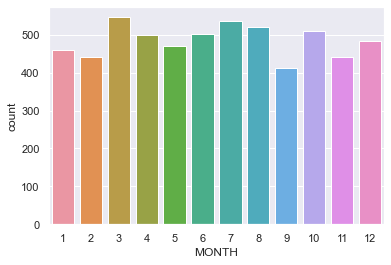

In [17]:
#Visualisation du nombre de vol par mois 
sns.countplot(x="MONTH",data=data);

In [18]:
#2
data.DAY_OF_WEEK.value_counts().sort_values(ascending=False)[0:1]

5    906
Name: DAY_OF_WEEK, dtype: int64

In [19]:
print("le jour de semaine avec le nombre de vols le plus elevé est le Vendredi(5)")

le jour de semaine avec le nombre de vols le plus elevé est le Vendredi(5)


In [20]:
# le vendredi est le jour de fin de semaine ce qui fait que les vool vont etre plus car c'est le weekend
#ce qui est tout a fait logique 

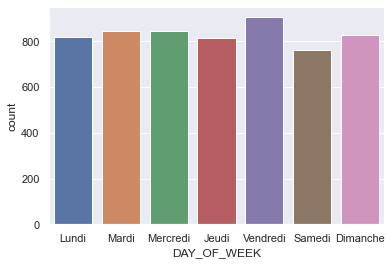

In [21]:
sns.countplot(x="DAY_OF_WEEK",data=data)
plt.xticks([0,1,2,3,4,5,6],["Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche"]);

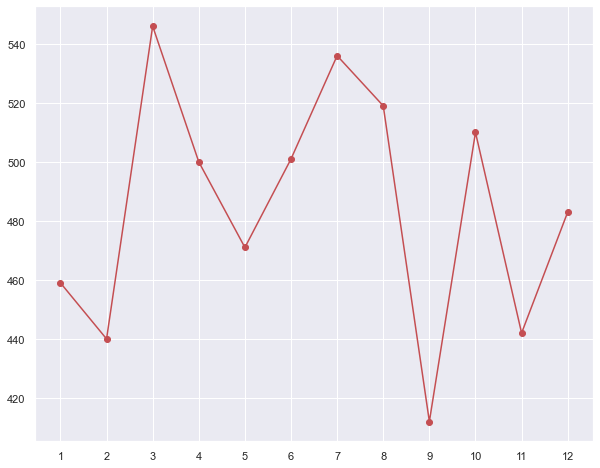

In [22]:
#3
plt.figure(figsize=(10,8))
plt.plot(data.groupby("MONTH").count()["YEAR"],'r-o')
plt.xticks(range(1,13));

In [23]:
"""D'apres ce graphe on peut déduire que y'a une tendance en mois de mars et juillet et aussi a la fin de léannée
et c'est les mois de vacances contrairement a septembre par exemple ."""

"D'apres ce graphe on peut déduire que y'a une tendance en mois de mars et juillet et aussi a la fin de léannée\net c'est les mois de vacances contrairement a septembre par exemple ."

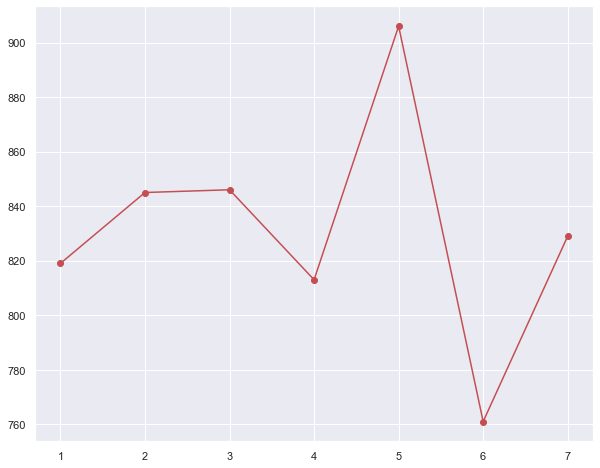

In [24]:
#4
plt.figure(figsize=(10,8))
plt.plot(data.groupby("DAY_OF_WEEK").count()["YEAR"],'r-o')
plt.xticks(range(1,8));

In [25]:
"""On peut clairement voire que les debuts de weekends en la plus grande valeur 
ce qui logique apres une diminution expliquée par le weekend ou y'a pas beucoup de voyage
et apres le debut de semaine une tendance lié au debut de travail avec une stabilité au
milieu de la semaine."""


"On peut clairement voire que les debuts de weekends en la plus grande valeur \nce qui logique apres une diminution expliquée par le weekend ou y'a pas beucoup de voyage\net apres le debut de semaine une tendance lié au debut de travail avec une stabilité au\nmilieu de la semaine."

Question 4 : Aéroport de départ et d'arrivée

In [26]:
#1
print(f" il y'a {data.ORIGIN_AIRPORT.nunique()} aéroports de départ.")

 il y'a 359 aéroports de départ.


In [27]:
#1
print(f" il y'a {data.DESTINATION_AIRPORT.nunique()} aéroports d'arrivée.")

 il y'a 363 aéroports d'arrivée.


In [28]:
#2 Les 5  aeroports de depart avec le plus de vols
data.ORIGIN_AIRPORT.value_counts()[0:5]

ATL    340
ORD    284
DFW    205
DEN    204
LAX    191
Name: ORIGIN_AIRPORT, dtype: int64

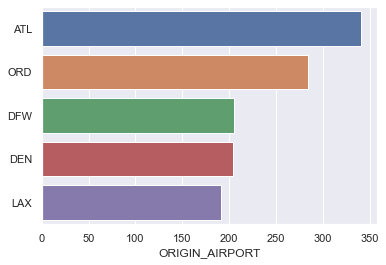

In [29]:
#la visualisation
sns.barplot(x=data.ORIGIN_AIRPORT.value_counts()[0:5],y=data.ORIGIN_AIRPORT.value_counts().index[:5]);

In [30]:
#3 Les 5  aeroports d'arriver avec le plus de vols
data.DESTINATION_AIRPORT.value_counts()[0:5]

ATL    358
ORD    279
DFW    236
DEN    187
LAX    185
Name: DESTINATION_AIRPORT, dtype: int64

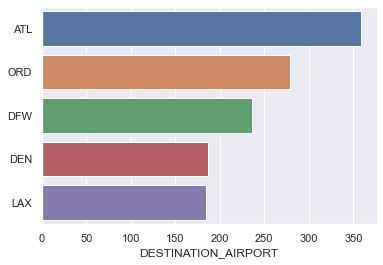

In [31]:
#la visualisation
sns.barplot(x=data.DESTINATION_AIRPORT.value_counts()[0:5],y=data.DESTINATION_AIRPORT.value_counts().index[:5]);

Question 5 : Compagnies aériennes

In [32]:
#1
print(f"Il y'a {data.AIRLINE.nunique()} compagnies aériennes.")

Il y'a 14 compagnies aériennes.


In [33]:
#2 Les 5  compagnies avec le plus de vols
data.AIRLINE.value_counts()[0:5]

WN    1267
DL     873
AA     729
OO     598
EV     567
Name: AIRLINE, dtype: int64

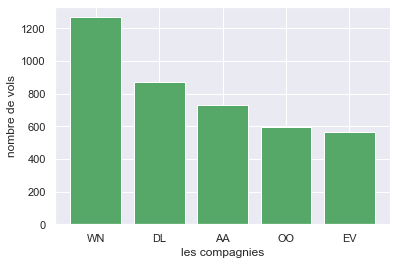

In [34]:
#3 visualisation par le diagramme a bar 
plt.bar(data["AIRLINE"].value_counts()[0:5].index , data["AIRLINE"].value_counts()[0:5],color="g")
plt.xlabel("les compagnies")
plt.ylabel("nombre de vols");

Question 6 : Retard de vol

In [35]:
#1
data.describe()['DEPARTURE_DELAY']

count    5724.000000
mean        9.608665
std        36.220415
min       -27.000000
25%        -5.000000
50%        -2.000000
75%         8.000000
max       465.000000
Name: DEPARTURE_DELAY, dtype: float64

In [36]:
#1
data.describe()['ARRIVAL_DELAY']

count    5711.000000
mean        4.769568
std        38.865547
min       -81.000000
25%       -13.000000
50%        -5.000000
75%         8.000000
max       485.000000
Name: ARRIVAL_DELAY, dtype: float64

In [37]:
vol_retard=data.loc[data.DEPARTURE_DELAY>0]
vol_avant=data.loc[data.DEPARTURE_DELAY<0]
vol=data.loc[data.DEPARTURE_DELAY==0]

In [38]:
#2
print(f"Nombre de vols qui ont fait du retard a démarrer est : {len(vol_retard)} vols.")
print(f"Nombre de vols qui ont démarré avant le temps est : {len(vol_avant)} vols.")

Nombre de vols qui ont fait du retard a démarrer est : 2100 vols.
Nombre de vols qui ont démarré avant le temps est : 3306 vols.


In [39]:
arr_retard=data.loc[data.ARRIVAL_DELAY>0]
arr_avant=data.loc[data.ARRIVAL_DELAY<0]
arr=data.loc[data.ARRIVAL_DELAY==0]

In [40]:
a=(len(arr_retard)*100/data.shape[0])
b=(len(arr_avant)*100/data.shape[0])

In [41]:
#3
print(f"Nombre de vols qui ont fait du retard a arriver est : {round(a,2)}%.")
print(f"Nombre de vols qui ont démarré avant le temps est : {round(b,2)}%.")

Nombre de vols qui ont fait du retard a arriver est : 36.26%.
Nombre de vols qui ont démarré avant le temps est : 60.01%.


In [42]:
#4 Ajout de la colonne DELAYED_D
delay=[]
for x in data.DEPARTURE_DELAY:
    if x>0:
        delay.append(1)
    else :
        delay.append(0)
len(delay)


5819

In [43]:
data["DELAYD_D"]=pd.Series(delay)

In [44]:
#5 Ajout de la colonne DELAYED_A
data["DELAYD_A"]=data.ARRIVAL_DELAY.apply(lambda x:  1 if x>0 else 0 )

In [45]:
#ajout des deux colonnes précédentes
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYD_D,DELAYD_A
0,2015,5,30,6,UA,814,N448UA,LAX,LAS,1305,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2015,6,19,5,B6,202,N663JB,FLL,JFK,1126,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2015,10,1,4,DL,2335,N989DL,10397,13303,1909,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,2015,1,26,1,UA,1448,N69826,MSY,IAH,755,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,2015,7,5,7,UA,1671,N36476,SFO,SAN,600,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


Question 07 : Les raisons de retard

In [46]:
#1
lst=list(data.columns)[-7:-2]
for i in lst:
    print(data[i].isna().sum())

    


4728
4728
4728
4728
4728


In [47]:
#Les 5 dernières colonnes ont le meme nombre de valeurs manquantes

In [48]:
#2 
# Il représente les vols sans retard

Question 08 : Le roulage de départ et le roulage d’arrivée

In [49]:
#1 Les quartiles de roulage de depart
data.TAXI_OUT.quantile([0.25,0.5,0.75])

0.25    11.0
0.50    14.0
0.75    19.0
Name: TAXI_OUT, dtype: float64

In [50]:
#1 Les quartiles de roulage d'arriver
data.TAXI_IN.quantile([0.25,0.5,0.75])

0.25    4.0
0.50    6.0
0.75    9.0
Name: TAXI_IN, dtype: float64

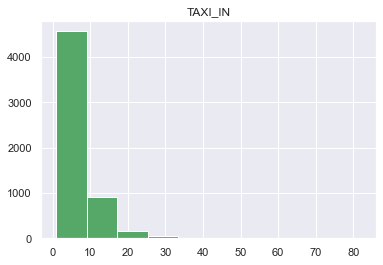

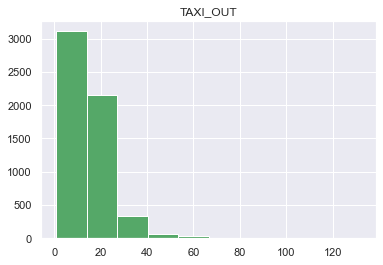

In [51]:
#2 Representation graphique 
taxi=["TAXI_IN","TAXI_OUT"]
for i in taxi :
    plt.hist(data[i],color='g')
    plt.title(i)
    plt.show()

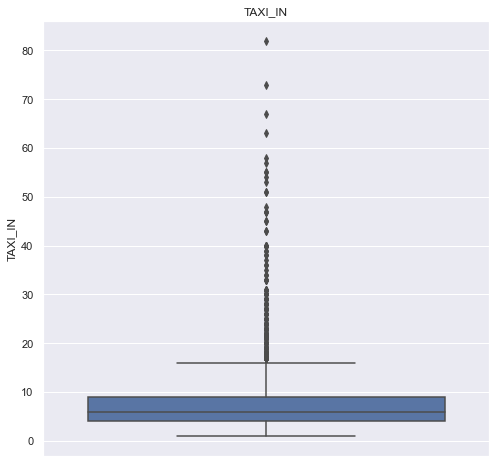

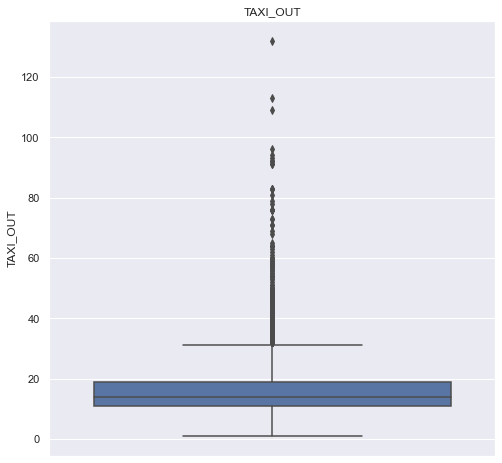

In [52]:
#3
for i in taxi :
    plt.figure(figsize=(8,8))
    sns.boxplot(y=i,data=data)
    plt.title(i)
    plt.show()

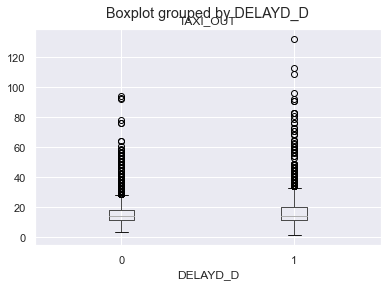

In [53]:
#4 boites a moustache
data.boxplot(column="TAXI_OUT",by="DELAYD_D");

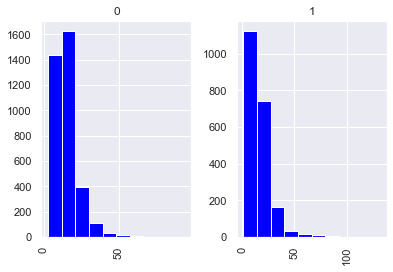

In [54]:
#4 histogrammes
data.hist(column="TAXI_OUT",by="DELAYD_D",color="blue");

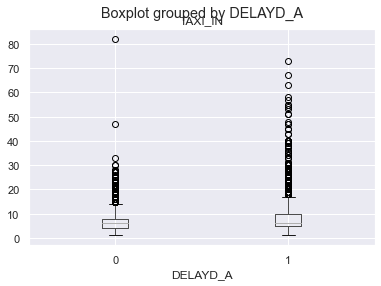

In [55]:
#5 Boite a moustaches
data.boxplot(column="TAXI_IN",by="DELAYD_A");

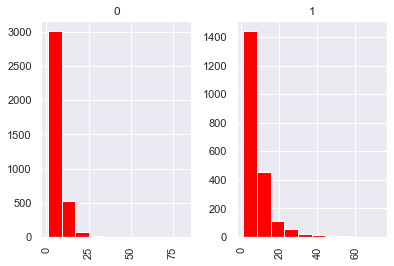

In [56]:
#5 Histogramme
data.hist(column="TAXI_IN",by="DELAYD_A",color="red");

Question 09 : Relation entre le retard de départ et le retard d’arrivée

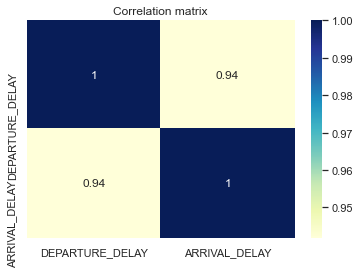

In [57]:
#1
delay=data[["DEPARTURE_DELAY","ARRIVAL_DELAY"]]
sns.heatmap(delay.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation matrix");


In [58]:
"""On peut voire qu'il y'a une très forte correclation entre le retard d'arriver et de depart
c'est logique car un vol qui depart en retard va surement arriver en retard"""

"On peut voire qu'il y'a une très forte correclation entre le retard d'arriver et de depart\nc'est logique car un vol qui depart en retard va surement arriver en retard"

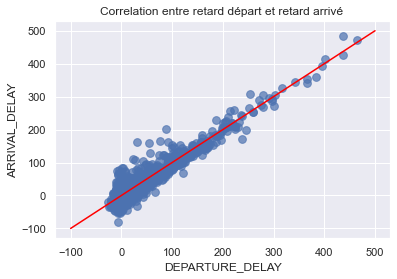

In [59]:
#2
plt.scatter(data.DEPARTURE_DELAY,data.ARRIVAL_DELAY,s=60,alpha=0.7)
plt.plot([-100,500],[-100,500],c="red")
plt.xlabel("DEPARTURE_DELAY")
plt.ylabel("ARRIVAL_DELAY")
plt.title("Correlation entre retard départ et retard arrivé ");

In [60]:
#La forte correlation ce voit clairement sure le graphe y=x

In [61]:
variable=data[["DEPARTURE_DELAY","ARRIVAL_DELAY",'SCHEDULED_TIME','AIR_TIME','ELAPSED_TIME']]

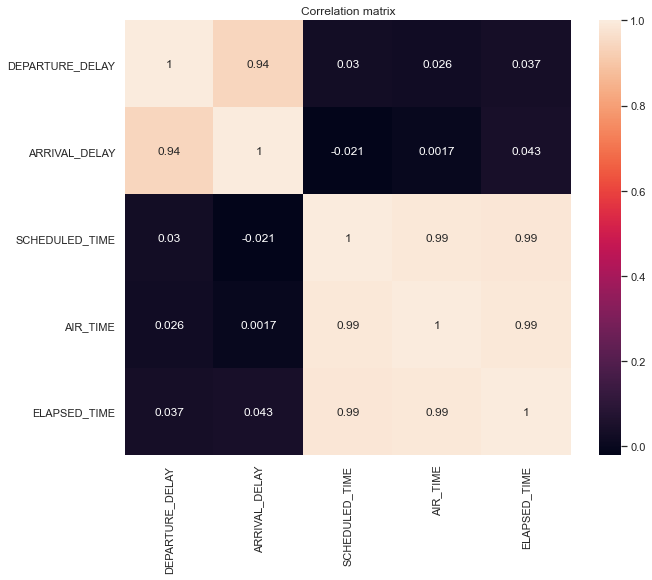

In [62]:
#3
plt.figure(figsize=(10,8))
sns.heatmap(variable.corr(),annot=True)
plt.title("Correlation matrix");

Question 10 : Durée de vol vs Distance

In [63]:
x=data[["ELAPSED_TIME","DISTANCE"]]
y=data[["SCHEDULED_TIME","DISTANCE"]]
z=data[["AIR_TIME","DISTANCE"]]

In [64]:
#les 3 premiere quetsions à la fois
for i in list([x,y,z]):
    print(i.corr())

              ELAPSED_TIME  DISTANCE
ELAPSED_TIME      1.000000  0.972947
DISTANCE          0.972947  1.000000
                SCHEDULED_TIME  DISTANCE
SCHEDULED_TIME        1.000000  0.984218
DISTANCE              0.984218  1.000000
          AIR_TIME  DISTANCE
AIR_TIME  1.000000  0.985406
DISTANCE  0.985406  1.000000


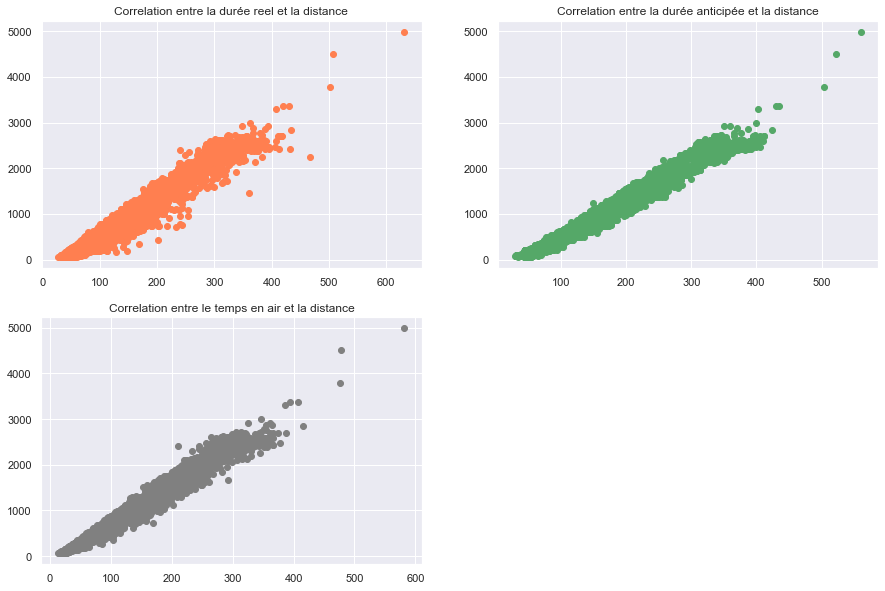

In [65]:
#4
plt.tight_layout
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(data.ELAPSED_TIME,data.DISTANCE,color="coral")
plt.title("Correlation entre la durée reel et la distance")
plt.subplot(2,2,2)
plt.scatter(data.SCHEDULED_TIME,data.DISTANCE,color="g")
plt.title("Correlation entre la durée anticipée et la distance")
plt.subplot(2,2,3)
plt.scatter(data.AIR_TIME,data.DISTANCE,color="grey")
plt.title("Correlation entre le temps en air et la distance")
plt.show()

In [66]:
# il y'a aussi une très forte correlation entre la distance et le durées devol
# car si la distance est grande c'est normale que la durée du vol sera grande.

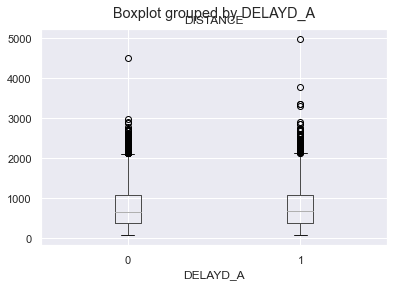

In [67]:
#5 Boite à moustaches 
data.boxplot(column="DISTANCE",by="DELAYD_A");

In [68]:
#j'ai choisie la colonne retard d'arriver car la distance a un impacte sur l'arriver et non pas le depart